#               Web Science Data Mining Homework


- we have a dataset about cars and we want to use data minig algorithms to build a model to classify the types of  the cars in    the data set:

- to achieve  that we will do the following

     * preprocessing the data :
     
        - handling missing data
        - converting the categorical data into numerical
        - splitting the data into train and test

     * build the calssification model :
    
        - build logistic regression model
        - bulid decision tree model
        - build naive byes model
         
     * evaluating the model:
     
        - view the evaaluation metrics like precion ,recall acuuracy and f-score
        - plot the roc curve
        - compare the metrics of the models and choose the best one 
  


In [1]:
# loading the packages
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# loading the data
raw_data=pd.read_csv(r'vehicles.csv')


In [4]:
# view the information of the data
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [5]:
# view the head of data
raw_data.head(10)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
5,7222379453,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1600,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
6,7221952215,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
7,7220195662,https://hudsonvalley.craigslist.org/cto/d/poug...,hudson valley,https://hudsonvalley.craigslist.org,15995,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
8,7209064557,https://medford.craigslist.org/cto/d/grants-pa...,medford-ashland,https://medford.craigslist.org,5000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,or,NaN,NaN,NaN
9,7219485069,https://erie.craigslist.org/cto/d/erie-2012-su...,erie,https://erie.craigslist.org,3000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,pa,NaN,NaN,NaN


In [35]:
# view the information about  the data
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

###### from the the cells above :
we see that there are categorical data and numerical data
there are missing values in some columns 

##### the first step : remove the features that has no effect on the target

we will remove the columns that has no effect on the calssificaion

these columns are general information and has no relationship with the type of the car so we remove them
(id,url,region,region_url,posting_date,image_url,VIN,model,lat,long,description)

In [36]:
# remove the columns that we don't need
data=raw_data.drop(['region','id','url','region_url','posting_date','image_url','VIN','model','lat','long','county','size','description','title_status'],axis=1)

# view the columns 
data.columns

Index(['price', 'year', 'manufacturer', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'drive', 'type', 'paint_color', 'state'],
      dtype='object')

In [37]:
# the information about the data after deletion 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          425675 non-null  float64
 2   manufacturer  409234 non-null  object 
 3   condition     252776 non-null  object 
 4   cylinders     249202 non-null  object 
 5   fuel          423867 non-null  object 
 6   odometer      422480 non-null  float64
 7   transmission  424324 non-null  object 
 8   drive         296313 non-null  object 
 9   type          334022 non-null  object 
 10  paint_color   296677 non-null  object 
 11  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 39.1+ MB


##                                          Hanling Missing Vlaues


we want to classify the cars due to the type so the type column is the target column or we can say it is y column
this column shouldn't has missing values and as it the target we cann't fill it because it is correlated with the other columns column.
the 'type' column is the target column so if it has null value , that mean all the row shoul be deleted



In [38]:
# the number of missing values in every column
data.isnull().sum()

price                0
year              1205
manufacturer     17646
condition       174104
cylinders       177678
fuel              3013
odometer          4400
transmission      2556
drive           130567
type             92858
paint_color     130203
state                0
dtype: int64

In [46]:
# choose the data that has no null values in target co;lumn
processed_data=data[data['type'].isnull()==False]


# choose the target column(Y) or output
target=processed_data.type
target

27           pickup
28           pickup
29           pickup
30           pickup
31            truck
            ...    
426875        sedan
426876        sedan
426877    hatchback
426878        sedan
426879        coupe
Name: type, Length: 334022, dtype: object

In [47]:
# drop the target feature
processed_data1= processed_data.drop('type',axis=1)


now the (processed_data1) will be the X data or input and we will deal with it and prepare it to be a good data for traninig

In [50]:
# the number of missing data in input
sum_of_null_data=processed_data1.isnull().sum()
sum_of_null_data


price                0
year              1014
manufacturer     11160
condition       114021
cylinders       112511
fuel              1841
odometer          3446
transmission      1856
drive            69735
paint_color      64197
state                0
dtype: int64

In [51]:
# calculating the percentage of missing datain every column
for i in sum_of_null_data.index:
    print('the precentage of null data in feature',i,': is',sum_of_null_data[i]/len(processed_data)*100,'%')

the precentage of null data in feature price : is 0.0 %
the precentage of null data in feature year : is 0.3035728185568615 %
the precentage of null data in feature manufacturer : is 3.341097292992677 %
the precentage of null data in feature condition : is 34.13577548784212 %
the precentage of null data in feature cylinders : is 33.68370945626336 %
the precentage of null data in feature fuel : is 0.551161300752645 %
the precentage of null data in feature odometer : is 1.0316685727287425 %
the precentage of null data in feature transmission : is 0.5556520229206459 %
the precentage of null data in feature drive : is 20.87736735903623 %
the precentage of null data in feature paint_color : is 19.219392734610295 %
the precentage of null data in feature state : is 0.0 %


- we can see that there are some features has a more than 30% are  null values in  let's visulalize these null values
- usually in the case of more than 30% of null values , we use to delete that feature.
- we will not delete the feature , we will try to fill the null values
- we can view a shape that show us the amount of the null values in every feature

####                                 vissulalize the null values

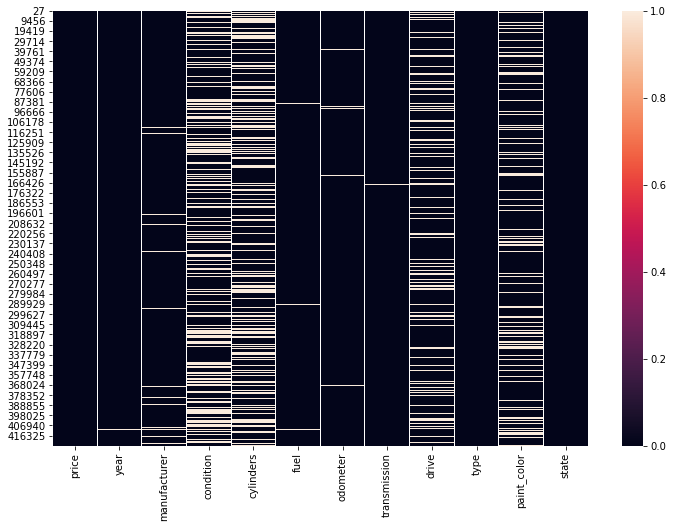

In [52]:
# the size of the figure
fig=plt.figure(figsize=(12,8))

# view a shape that clarify the missing values
nan_matrix=processed_data.isnull()
sns.heatmap(nan_matrix)

as we can see there are some features have a high percentage of null values

###   view information about the data :

In [54]:
processed_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334022 entries, 27 to 426879
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         334022 non-null  int64  
 1   year          333008 non-null  float64
 2   manufacturer  322862 non-null  object 
 3   condition     220001 non-null  object 
 4   cylinders     221511 non-null  object 
 5   fuel          332181 non-null  object 
 6   odometer      330576 non-null  float64
 7   transmission  332166 non-null  object 
 8   drive         264287 non-null  object 
 9   paint_color   269825 non-null  object 
 10  state         334022 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 30.6+ MB


####    types of features

- as we can see there are tow types of data , categorical data and numerical data
- we will process the data and convert all of them to numerical data


#### handling missing data in numerical features
- beacause the number of missing data in numerical values are very small in compare with the size of the data 
- so we will drop this null values


In [55]:
num_data=processed_data1[['year','odometer','price']]
num_data.isnull().sum()

year        1014
odometer    3446
price          0
dtype: int64

In [56]:
# drop the rows with missing values  in the numerical features
# (we drop them because the number of them is very small in comparing with the size of the data)
clean_num_data=num_data.dropna()

# check the number of missing values
clean_num_data.isnull().sum()

year        0
odometer    0
price       0
dtype: int64

In [58]:
# take the all x data after deleting the missing rows from numerical features
data_after_clean_num=processed_data1.loc[clean_num_data.index,:]

# recheck the number of missing values
data_after_clean_num.isnull().sum()

price                0
year                 0
manufacturer     10018
condition       111231
cylinders       110348
fuel              1709
odometer             0
transmission      1626
drive            68736
paint_color      62839
state                0
dtype: int64

## processing the categorical features;

- we will start converting categorical features to numerical:


In [59]:
# select the categorical features
categorical_data=data_after_clean_num.select_dtypes(include=['object'])


# if the values of the row are all null we remove it
categorical_data1=categorical_data.dropna(thresh=1)


# view a sample of data
categorical_data1.head()

,manufacturer,condition,cylinders,fuel,transmission,drive,paint_color,state
27,gmc,good,8 cylinders,gas,other,NaN,white,al
28,chevrolet,good,8 cylinders,gas,other,NaN,blue,al
29,chevrolet,good,8 cylinders,gas,other,NaN,red,al
30,toyota,good,8 cylinders,gas,other,NaN,red,al
31,ford,excellent,6 cylinders,gas,automatic,rwd,black,al


In [60]:
# the number of null values in every column
col_with_nulls=categorical_data1.isnull().sum()
col_with_nulls

manufacturer     10018
condition       111231
cylinders       110348
fuel              1709
transmission      1626
drive            68736
paint_color      62839
state                0
dtype: int64

In [61]:
# the categorical data columns
categorical_data1.columns

Index(['manufacturer', 'condition', 'cylinders', 'fuel', 'transmission',
       'drive', 'paint_color', 'state'],
      dtype='object')

### we will convert the categorical features to numerical values,  but we will keep the null values without changing

### why we want to keep the null value?

### the answer is : because we will apply the IterativeImputer class from sklearn library, this class can predict the null values in one column by using the information in other columns, but all the columns should be numerical values



In [62]:
#  this code convert the categorical features to numerical with keeping on null values

# import label encoder
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

# make empty dictionary
dic={}          

for i in col_with_nulls.index:          # counter over the columns
  if(col_with_nulls[i]>0):              # if the column has null values
    dic[i+'new']= label_encoder.fit_transform(categorical_data1[i]).astype('float')  #convert to numerical 
    dic[i+'new'][np.where(dic[i+'new']==dic[i+'new'].max())]=np.nan                  # the null value take the max value when using LabelEncoder
  if(col_with_nulls[i]==0):
    
    dic[i+'new']= label_encoder.fit_transform(categorical_data1[i]).astype('float')

# convert the dictionary to dataframe
categorical_data2=pd.DataFrame(dic)

# check the number of null values after converting to ensure that we keep the null values
categorical_data2.isnull().sum()


manufacturernew     10018
conditionnew       111231
cylindersnew       110348
fuelnew              1709
transmissionnew      1626
drivenew            68736
paint_colornew      62839
statenew                0
dtype: int64

In [63]:
# view the head of converted categorical data
categorical_data2.head()

,manufacturernew,conditionnew,cylindersnew,fuelnew,transmissionnew,drivenew,paint_colornew,statenew
0,14.0,2.0,6.0,2.0,2.0,NaN,10.0,1.0
1,7.0,2.0,6.0,2.0,2.0,NaN,1.0,1.0
2,7.0,2.0,6.0,2.0,2.0,NaN,8.0,1.0
3,39.0,2.0,6.0,2.0,2.0,NaN,8.0,1.0
4,13.0,0.0,5.0,2.0,0.0,2.0,0.0,1.0


#### now we will aplly the Iterative_Imputer form sklearn library to predict the missing values in every column by using the information from the other columns 

In [64]:
# import the package
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# take an instane of the class
iterative_imputer=IterativeImputer()

# fit and transform
categorical_data3=iterative_imputer.fit_transform(categorical_data2)

# view a sample of resulted data
categorical_data3[:10]

array([[14.        ,  2.        ,  6.        ,  2.        ,  2.        ,
         1.1326523 , 10.        ,  1.        ],
       [ 7.        ,  2.        ,  6.        ,  2.        ,  2.        ,
         1.0668195 ,  1.        ,  1.        ],
       [ 7.        ,  2.        ,  6.        ,  2.        ,  2.        ,
         1.16264042,  8.        ,  1.        ],
       [39.        ,  2.        ,  6.        ,  2.        ,  2.        ,
         0.90039804,  8.        ,  1.        ],
       [13.        ,  0.        ,  5.        ,  2.        ,  0.        ,
         2.        ,  0.        ,  1.        ],
       [14.        ,  2.        ,  6.        ,  2.        ,  2.        ,
         0.        ,  0.        ,  1.        ],
       [ 7.        ,  2.        ,  5.        ,  2.        ,  2.        ,
         0.        ,  9.        ,  1.        ],
       [39.        ,  0.        ,  5.        ,  2.        ,  0.        ,
         0.        ,  5.        ,  1.        ],
       [ 7.        ,  2.        

- the returned data is a numpy array , so we will convert it  pandas dataframe
- there are some float number , we want them integer number so we will round them


In [65]:

categorical_data4=np.round(pd.DataFrame(categorical_data3,columns=categorical_data2.columns))

# view the head of data
print(categorical_data4.head())




   manufacturernew  conditionnew  cylindersnew  fuelnew  transmissionnew  \
0             14.0           2.0           6.0      2.0              2.0   
1              7.0           2.0           6.0      2.0              2.0   
2              7.0           2.0           6.0      2.0              2.0   
3             39.0           2.0           6.0      2.0              2.0   
4             13.0           0.0           5.0      2.0              0.0   

   drivenew  paint_colornew  statenew  
0       1.0            10.0       1.0  
1       1.0             1.0       1.0  
2       1.0             8.0       1.0  
3       1.0             8.0       1.0  
4       2.0             0.0       1.0  


In [66]:
# epair the index
categorical_data4=categorical_data4.set_index(data_after_clean_num.index)

# sample of data
categorical_data4



,manufacturernew,conditionnew,cylindersnew,fuelnew,transmissionnew,drivenew,paint_colornew,statenew
27,14.0,2.0,6.0,2.0,2.0,1.0,10.0,1.0
28,7.0,2.0,6.0,2.0,2.0,1.0,1.0,1.0
29,7.0,2.0,6.0,2.0,2.0,1.0,8.0,1.0
30,39.0,2.0,6.0,2.0,2.0,1.0,8.0,1.0
31,13.0,0.0,5.0,2.0,0.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...
426875,31.0,2.0,5.0,2.0,2.0,1.0,6.0,50.0
426876,41.0,2.0,5.0,2.0,2.0,1.0,8.0,50.0
426877,6.0,2.0,6.0,0.0,2.0,1.0,10.0,50.0
426878,23.0,2.0,5.0,2.0,2.0,1.0,9.0,50.0


In [67]:
# recompine the categorical data and the numerical data
final_data=pd.concat([clean_num_data,categorical_data4],axis=1)

# sample of data
final_data.head()

,year,odometer,price,manufacturernew,conditionnew,cylindersnew,fuelnew,transmissionnew,drivenew,paint_colornew,statenew
27,2014.0,57923.0,33590,14.0,2.0,6.0,2.0,2.0,1.0,10.0,1.0
28,2010.0,71229.0,22590,7.0,2.0,6.0,2.0,2.0,1.0,1.0,1.0
29,2020.0,19160.0,39590,7.0,2.0,6.0,2.0,2.0,1.0,8.0,1.0
30,2017.0,41124.0,30990,39.0,2.0,6.0,2.0,2.0,1.0,8.0,1.0
31,2013.0,128000.0,15000,13.0,0.0,5.0,2.0,0.0,2.0,0.0,1.0


In [68]:
# describe the data
final_data.describe()

,year,odometer,price,manufacturernew,conditionnew,cylindersnew,fuelnew,transmissionnew,drivenew,paint_colornew,statenew
count,329562.000000,3.295620e+05,3.295620e+05,329562.000000,329562.000000,329562.000000,329562.000000,329562.000000,329562.000000,329562.000000,329562.000000
mean,2011.974481,9.097956e+04,3.952616e+04,18.910405,1.205910,4.635261,2.052649,0.424272,0.803154,5.599010,23.674334
std,8.550130,1.721191e+05,7.238498e+06,11.631142,0.897388,1.068713,0.783099,0.784391,0.686762,3.723067,15.275697
min,1900.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2009.000000,3.460500e+04,6.500000e+03,10.000000,0.000000,4.000000,2.000000,0.000000,0.000000,1.000000,9.000000
50%,2014.000000,7.982500e+04,1.499900e+04,16.000000,1.000000,5.000000,2.000000,0.000000,1.000000,6.000000,23.000000
75%,2017.000000,1.276338e+05,2.759000e+04,29.000000,2.000000,5.000000,2.000000,0.000000,1.000000,9.000000,37.000000
max,2022.000000,1.000000e+07,3.736929e+09,41.000000,5.000000,7.000000,4.000000,2.000000,2.000000,11.000000,50.000000


# handling outliers

- beacuse the size of the data are big , if we plot it it will not apear in clar shape so:
- we will view a part of the price and odometer data boxplot to see the outliers and remove them



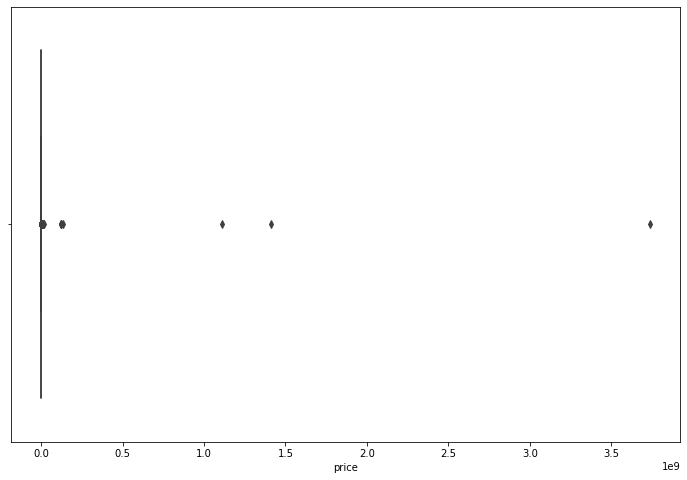

In [69]:
# set the size of the figure
fig=plt.figure(figsize=(12,8))

# view a box plot of price colum
sns.boxplot(final_data.price)

- because the high range of data , the most of data is located in a narrow range  so it doesn't all appear in the shape
- but from the shape we can see that these are some outlies that have a high values

In [70]:
# the number of values greater than 200000
len(final_data[final_data.price>200000].price)

66

- we note that there is a small number of values greater than 200000 so these can be outliers and we will remove them

In [71]:
# choose the data smaller than 200000
final_data1=final_data[final_data.price<200000]

# sample of data
final_data1


,year,odometer,price,manufacturernew,conditionnew,cylindersnew,fuelnew,transmissionnew,drivenew,paint_colornew,statenew
27,2014.0,57923.0,33590,14.0,2.0,6.0,2.0,2.0,1.0,10.0,1.0
28,2010.0,71229.0,22590,7.0,2.0,6.0,2.0,2.0,1.0,1.0,1.0
29,2020.0,19160.0,39590,7.0,2.0,6.0,2.0,2.0,1.0,8.0,1.0
30,2017.0,41124.0,30990,39.0,2.0,6.0,2.0,2.0,1.0,8.0,1.0
31,2013.0,128000.0,15000,13.0,0.0,5.0,2.0,0.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
426875,2019.0,32226.0,23590,31.0,2.0,5.0,2.0,2.0,1.0,6.0,50.0
426876,2020.0,12029.0,30590,41.0,2.0,5.0,2.0,2.0,1.0,8.0,50.0
426877,2020.0,4174.0,34990,6.0,2.0,6.0,0.0,2.0,1.0,10.0,50.0
426878,2018.0,30112.0,28990,23.0,2.0,5.0,2.0,2.0,1.0,9.0,50.0


##### we will do the same process for odometer feature

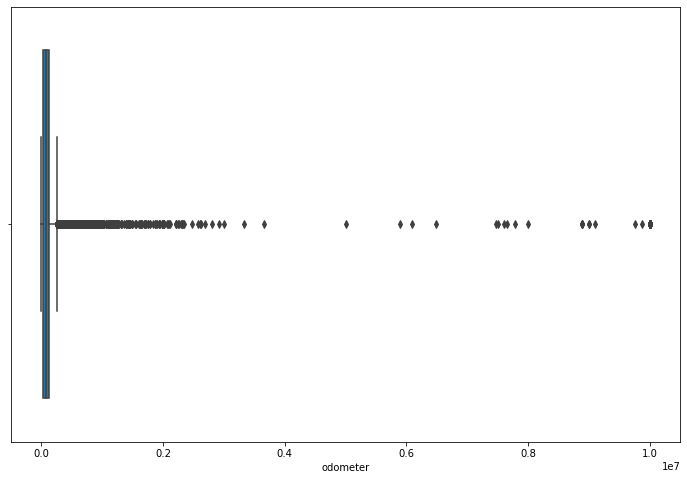

In [72]:
# set the size of the plot figure
fig=plt.figure(figsize=(12,8))


# view boxplot of odometer feature
sns.boxplot(final_data1.odometer)

In [73]:
# the number of odemetr values greater than 400000
len(final_data1[final_data1.odometer>400000].odometer)


760

- we see that the number of odometer values which are greater than 400000 is small in comparison with the size of data
- wecan consider them as outliers and remove them

In [74]:
# take the data which odometer is smaller than 400000
final_data2=final_data1[final_data1.odometer<400000]



In [75]:
# viw a desciption of the data after that previous preprocessing
final_data2.describe()

,year,odometer,price,manufacturernew,conditionnew,cylindersnew,fuelnew,transmissionnew,drivenew,paint_colornew,statenew
count,328718.000000,328718.000000,328718.000000,328718.000000,328718.000000,328718.000000,328718.000000,328718.000000,328718.000000,328718.000000,328718.000000
mean,2012.005451,86754.873034,18281.568207,18.911727,1.205130,4.634237,2.054971,0.424209,0.802457,5.597819,23.676793
std,8.484423,61211.903624,15216.686712,11.635013,0.896877,1.068119,0.781024,0.784864,0.686367,3.722913,15.275397
min,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2009.000000,34526.000000,6500.000000,10.000000,0.000000,4.000000,2.000000,0.000000,0.000000,1.000000,9.000000
50%,2014.000000,79540.000000,15000.000000,16.000000,1.000000,5.000000,2.000000,0.000000,1.000000,6.000000,23.000000
75%,2017.000000,127081.000000,27590.000000,29.000000,2.000000,5.000000,2.000000,0.000000,1.000000,9.000000,37.000000
max,2022.000000,399999.000000,199999.000000,41.000000,5.000000,7.000000,4.000000,2.000000,2.000000,11.000000,50.000000


- as we can see that some features has a big standard deviation 
- so we will normalize the data
- the normalization will be by deviding every feature on it's max number so the values will be in range [0,1]

In [82]:
# new emplty dataframe
final_data3=pd.DataFrame()

# divide every feature on it's max value
for i in final_data2.columns:
    final_data3[i]=final_data2[i]/final_data2[i].max()

# view the final shape of the data    
final_data3.head()    

,year,odometer,price,manufacturernew,conditionnew,cylindersnew,fuelnew,transmissionnew,drivenew,paint_colornew,statenew
27,0.996044,0.144808,0.167951,0.341463,0.4,0.857143,0.5,1.0,0.5,0.909091,0.02
28,0.994065,0.178073,0.112951,0.170732,0.4,0.857143,0.5,1.0,0.5,0.090909,0.02
29,0.999011,0.047900,0.197951,0.170732,0.4,0.857143,0.5,1.0,0.5,0.727273,0.02
30,0.997527,0.102810,0.154951,0.951220,0.4,0.857143,0.5,1.0,0.5,0.727273,0.02
31,0.995549,0.320001,0.075000,0.317073,0.0,0.714286,0.5,0.0,1.0,0.000000,0.02


## split the data and train the models:




In [86]:
# determine input and output 
X=final_data3
Y=target[final_data3.index]


##### split the data into train and test

In [87]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

### the decision tree model

In [88]:
# import the class model
from sklearn.tree import DecisionTreeClassifier

# take an istance
decision_tree_model=DecisionTreeClassifier()

# fit the model
decision_tree_model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [99]:
# function to evalute the model

from sklearn.metrics import accuracy_score,f1_score,classification_report,precision_score,recall_score
def evalute_model(model_name,test_input,test_output):
    
#    predict data using the model 
    predicted_data=model_name.predict(test_input)
    
    print('the accuracy secore is :',accuracy_score(predicted_data,test_output))
    print('the f1-secore weighted average is :',f1_score(predicted_data,test_output,average='weighted'))
    print('the precision weighted average is :',precision_score(predicted_data,test_output,average='weighted'))
    print('the recall weighted average is :',recall_score(predicted_data,test_output,average='weighted'))


    print('the calssification report is : \n',classification_report(predicted_data,test_output))

    

In [100]:
# evaluation of decision tree model
evalute_model(decision_tree_model,X_test,Y_test)


the accuracy secore is : 0.7581072036991969
the f1-secore weighted average is : 0.7581271252074148
the precision weighted average is : 0.7581881565100441
the recall weighted average is : 0.7581072036991969
the calssification report is : 
               precision    recall  f1-score   support

         SUV       0.77      0.77      0.77     15140
         bus       0.50      0.52      0.51        82
 convertible       0.60      0.61      0.61      1575
       coupe       0.69      0.69      0.69      3807
   hatchback       0.70      0.70      0.70      3300
    mini-van       0.52      0.53      0.53       945
     offroad       0.37      0.38      0.37       122
       other       0.79      0.78      0.78      4331
      pickup       0.80      0.80      0.80      8474
       sedan       0.80      0.80      0.80     17132
       truck       0.75      0.75      0.75      6952
         van       0.68      0.66      0.67      1759
       wagon       0.63      0.64      0.64      2125

   

## naive bayes model

In [101]:
# import the package
from sklearn.naive_bayes import GaussianNB

# take an instance
naive_model=GaussianNB()

# fit the model
naive_model.fit(X_train,Y_train)

GaussianNB()

In [102]:
# evaluate the naive bayes model
evalute_model(naive_model,X_test,Y_test)

the accuracy secore is : 0.3740721586760769
the f1-secore weighted average is : 0.3746976098954502
the precision weighted average is : 0.4528957763886369
the recall weighted average is : 0.3740721586760769
the calssification report is : 
               precision    recall  f1-score   support

         SUV       0.54      0.46      0.50     17558
         bus       0.10      0.06      0.07       157
 convertible       0.15      0.20      0.18      1207
       coupe       0.23      0.43      0.30      2058
   hatchback       0.17      0.26      0.20      2150
    mini-van       0.70      0.09      0.16      7567
     offroad       0.17      0.11      0.14       183
       other       0.43      0.21      0.28      8698
      pickup       0.18      0.52      0.27      2986
       sedan       0.45      0.49      0.47     15977
       truck       0.37      0.43      0.40      5907
         van       0.15      0.21      0.18      1227
       wagon       0.01      0.17      0.01        69

   

## logistic regression model  

In [103]:
# import the class
from sklearn.linear_model import LogisticRegression

# take an instance
logistic_model=LogisticRegression(solver='sag',max_iter=500)

# fit the model
logistic_model.fit(X_train,Y_train)

LogisticRegression(max_iter=500, solver='sag')

In [105]:
evalute_model(logistic_model,X_test,Y_test)

the accuracy secore is : 0.43054879532733026
the f1-secore weighted average is : 0.4843518832613572
the precision weighted average is : 0.5988593840566037


C:\Users\rayan\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


the recall weighted average is : 0.43054879532733026


C:\Users\rayan\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rayan\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


the calssification report is : 
               precision    recall  f1-score   support

         SUV       0.55      0.46      0.50     17969
         bus       0.00      0.00      0.00         0
 convertible       0.00      1.00      0.00         1
       coupe       0.27      0.42      0.33      2469
   hatchback       0.03      0.25      0.06       403
    mini-van       0.00      0.00      0.00         1
     offroad       0.00      0.00      0.00         0
       other       0.08      0.27      0.13      1315
      pickup       0.29      0.38      0.33      6421
       sedan       0.78      0.42      0.55     31946
       truck       0.36      0.48      0.41      5130
         van       0.01      0.22      0.02        87
       wagon       0.00      0.00      0.00         2

    accuracy                           0.43     65744
   macro avg       0.18      0.30      0.18     65744
weighted avg       0.60      0.43      0.48     65744



C:\Users\rayan\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# note:

- the warning that apeared in evaluation of the logistic regression beacause there are some values in Y_test didn't appear in the predicted values 
- so the f-score assigned to zero (like 'bus' or 'wagon')
- we can ignore these warninig by the next code
- we put the code before the evaluating of logistic  regression

In [106]:
import warnings
warnings.filterwarnings('ignore')


In [126]:
# write a function to return the evaluation metrics in one dictionary 
def evaluation_score(model_name,test_input,test_output,name):
    
    predicted_data=model_name.predict(test_input)
    
    name={}
    
    name['accuracy_score']=accuracy_score(predicted_data,test_output)
    
    name['f1_score']=f1_score(predicted_data,test_output,average='weighted')
    
    name['precision_score']=precision_score(predicted_data,test_output,average='weighted')
                                            
    name['recall_score']=recall_score(predicted_data,test_output,average='weighted')
    
#     return a dictionary with the name of model contains all of its evaluation metrics
    return name


In [123]:
# dictionary of models and thier names
models={'decision_tree':decision_tree_model,
         'naive_bayes':naive_model,
       'logistic_regression':logistic_model}

# create dictionary contains all the models with their evaluation metrics
models_scores={}
for model in models.keys():
    models_scores[model]=evaluation_score(models[model],X_test,Y_test,model)


In [124]:

print(models_scores)    

{'decision_tree': {'accuracy_score': 0.7581072036991969, 'f1_score': 0.7581271252074148, 'precision_score': 0.7581881565100441, 'recall_score': 0.7581072036991969}, 'naive_bayes': {'accuracy_score': 0.3740721586760769, 'f1_score': 0.3746976098954502, 'precision_score': 0.4528957763886369, 'recall_score': 0.3740721586760769}, 'logistic_regression': {'accuracy_score': 0.43054879532733026, 'f1_score': 0.4843518832613572, 'precision_score': 0.5988593840566037, 'recall_score': 0.43054879532733026}}


In [125]:
# convert the models_score dictionary to dataframe
models_score_dataframe=pd.DataFrame(models_scores)


,decision_tree,naive_bayes,logistic_regression
accuracy_score,0.758107,0.374072,0.430549
f1_score,0.758127,0.374698,0.484352
precision_score,0.758188,0.452896,0.598859
recall_score,0.758107,0.374072,0.430549


In [127]:
# view all the scores in one dataframe
models_score_dataframe

,decision_tree,naive_bayes,logistic_regression
accuracy_score,0.758107,0.374072,0.430549
f1_score,0.758127,0.374698,0.484352
precision_score,0.758188,0.452896,0.598859
recall_score,0.758107,0.374072,0.430549


#                                               The Result

- as we can see that the decision tree is the best model due to the evaluation metrics.

### how can we get better result ? 

- collect better data and try to get features that can be very effective in classificaton of cars types
- dive into data and concentrate more on data preprocessing
- try another algorithms
- apply statistical test to determine the best feature which has high degree of correlation with the output
- try another techniques  of regularization and normalization to avoid overfitting
- try polynomial features to make new feature if we have underfitting
